### 4. 워드클라우드 시각화  
- 네이버 카페 글을 크롤링하여 얻은 텍스트 파일에서 명사와 형용사만 추출하고, 추출한 단어와 그 빈도수를 담은 딕셔너리를 만드는 함수를 생성했다.  
- 단어와 빈도수가 담긴 딕셔너리를 통해서 워드클라우드를 그리도록 하였다.

#### 4-1) Okt를 이용해 형태소 추출 (명사, 형용사)

In [ ]:
def my_text_tag(keyword):
    
    from konlpy.tag import Okt
    import re
    # Okt를 이용해 형태소 분석
    okt = Okt()
    
    cafe_text = open("c:/data/cafe_data/" + keyword + ".txt", encoding='utf-8-sig').read()
    cafe_text = re.sub('[^가-힣]+', ' ', cafe_text)

    cafe_text_list = cafe_text.split(' ')
    cafe_text_list = list(filter(None, cafe_text_list))

    # 명사, 형용사만 추출
    word_tag = []
    for i in cafe_text_list:
        morph = okt.pos(i)
        for word, tag in morph:
            if tag in ['Noun', 'Adjective']:
                word_tag.append(word)
            
    # 단어 빈도수를 담은 딕셔너리 생성
    cafe_di = dict()
    
    for i in word_tag:
        if i not in keyword:
            if len(i) > 1:
                cafe_di[i] = cafe_di.get(i, 0) + 1
                
    return cafe_di

#### 4-2) 워드클라우드 생성

In [ ]:
def wordcloud(keyword):

    from wordcloud import WordCloud
    import matplotlib.pyplot as plt  # 그래프 그리는 모듈
    import matplotlib
    import re   #  데이터 정제를 위해서 필요한 모듈 
    import numpy as np  
    from PIL import Image  # 이미지 시각화를 위한 모듈

    txt_dict = my_text_tag(keyword)
    
    # 워드 클라우드의 배경이 되는 이미지 모양
    png_mask = np.array(Image.open("c:/project/truck.png"))
    
    # 워드 클라우드 그리기
    path = "c:/Windows/Fonts/NanumGothic.ttf"
    wc = WordCloud(font_path = path,
                   width = 1000, height = 800,
                   background_color = 'white',
                   mask = png_mask,
                   colormap = 'magma')
    wc = wc.generate_from_frequencies(txt_dict).to_file('c:/project/'+ keyword +'.png') 

    plt.figure(figsize = (15,15))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

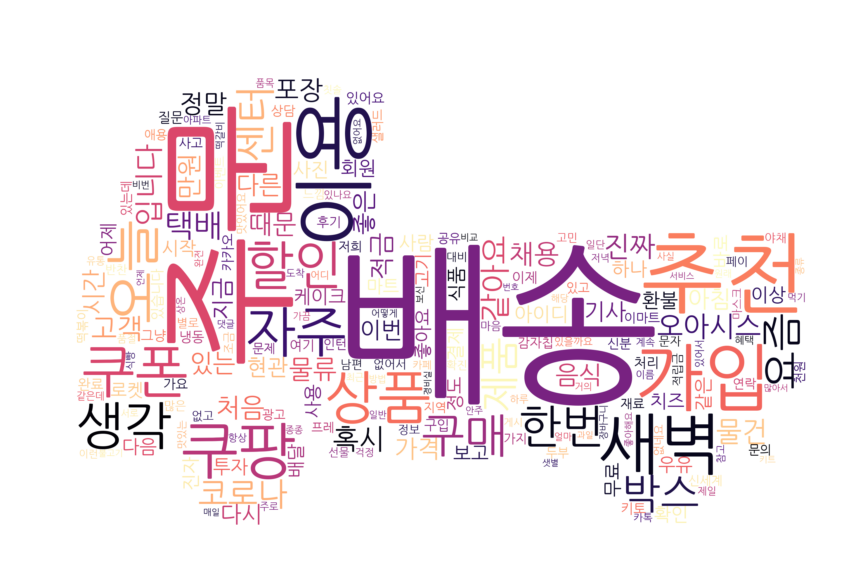

In [50]:
wordcloud('마켓컬리')
wordcloud('트립닷컴')